In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import random

In [2]:
@njit(fastmath=True)
def metropolis_ising(config, temperature, time):
    L = len(config)
    
    for _ in range(time):
        for _ in range(L*L):
            i = np.random.randint(0, L)
            j = np.random.randint(0, L)
            
            neighbors_sum = config[(i+1)%L, j] + config[i-1, j] + config[i, (j+1)%L] + config[i, j-1]
            delta_energy = 2 * config[i, j] * neighbors_sum
            
            if delta_energy <= 0 or np.random.rand() < np.exp(-delta_energy / temperature):
                config[i, j] *= -1
    
    return config

In [3]:
@njit(fastmath=True)
def metropolis_ising_magnetizations(config, temperature, time):
    L = len(config)
    magnetizations=np.zeros(time)

    for t in range(time):
        for _ in range(L*L):
            i = np.random.randint(0, L)
            j = np.random.randint(0, L)
            
            neighbors_sum = config[(i+1)%L, j] + config[i-1, j] + config[i, (j+1)%L] + config[i, j-1]
            delta_energy = 2 * config[i, j] * neighbors_sum
            
            if delta_energy <= 0 or np.random.rand() < np.exp(-delta_energy / temperature):
                config[i, j] *= -1
        magnetizations[t] = np.sum(config) / (L * L)
    
    return magnetizations

In [4]:
@njit(fastmath=True)
def metropolis_ising_final_magn(config, temperature, time):
    L = len(config)

    for t in range(time):
        for _ in range(L*L):
            i = np.random.randint(0, L)
            j = np.random.randint(0, L)
            
            neighbors_sum = config[(i+1)%L, j] + config[i-1, j] + config[i, (j+1)%L] + config[i, j-1]
            delta_energy = 2 * config[i, j] * neighbors_sum
            
            if delta_energy <= 0 or np.random.rand() < np.exp(-delta_energy / temperature):
                config[i, j] *= -1
    
    return np.sum(config) / (L * L)

In [5]:
def plot_trajectories(trajectories, L):
    
    plt.figure(figsize=(15,10))
    
    for i, trajectory in enumerate(trajectories):
        plt.plot(range(len(trajectory)), trajectory)
    
    plt.title(f"Magnetyzacja trajektoria dla L={L}")
    plt.xlabel("Czas (MCS)")
    plt.xlim(0,)
    plt.ylabel("(m(t))")
    plt.savefig(f"trajektorie{L}.jpg")

In [6]:
def plot_configuration(config, temperature, title):
    plt.figure(figsize=(10,10))
    plt.imshow(config, cmap='cool')
    plt.title(f"Dla L={title}" + f" (T={temperature})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.savefig(f"L{title}T{temperature}.jpg")


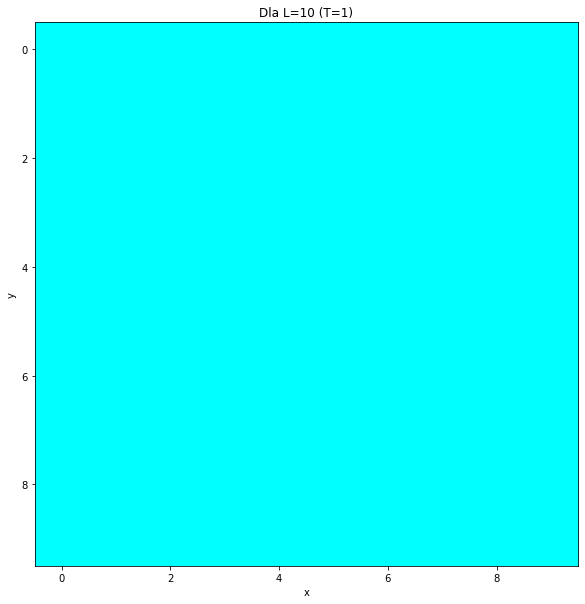

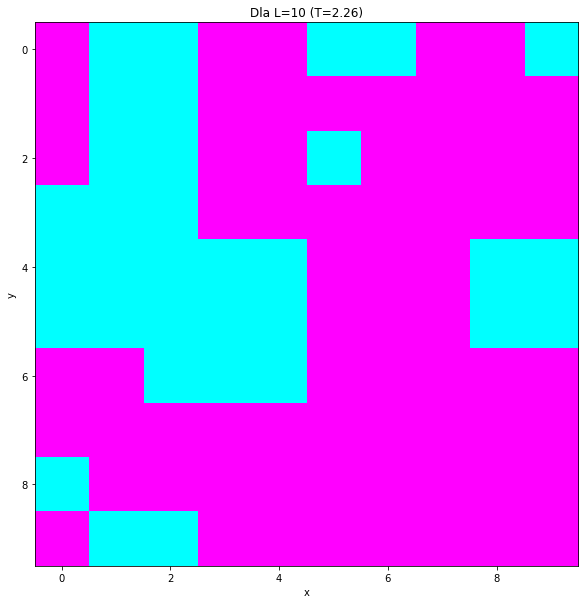

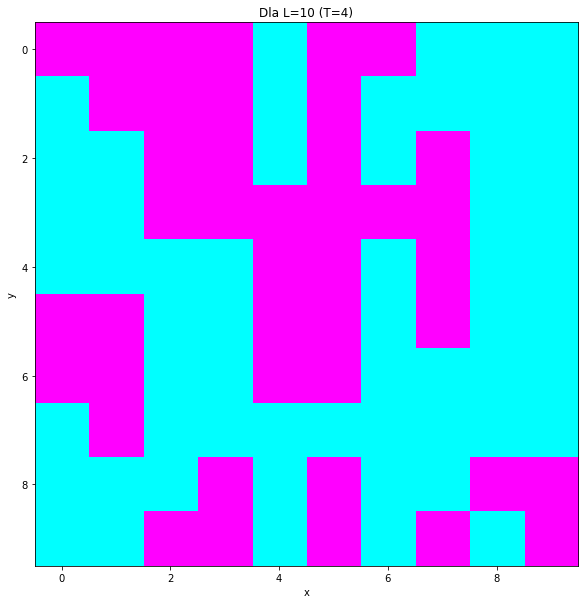

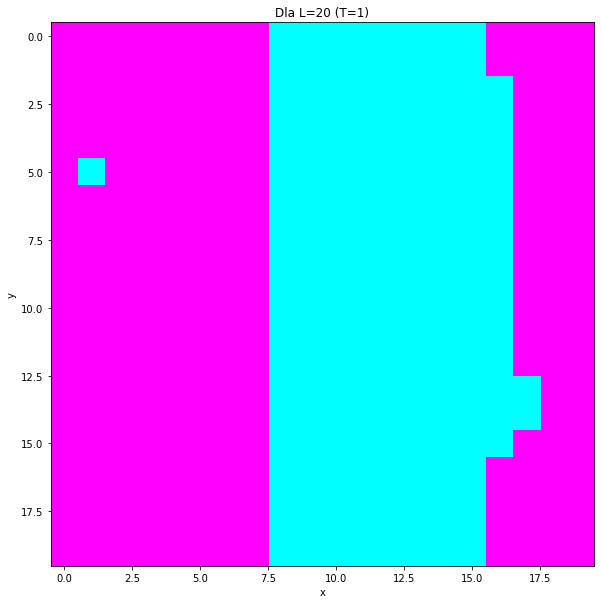

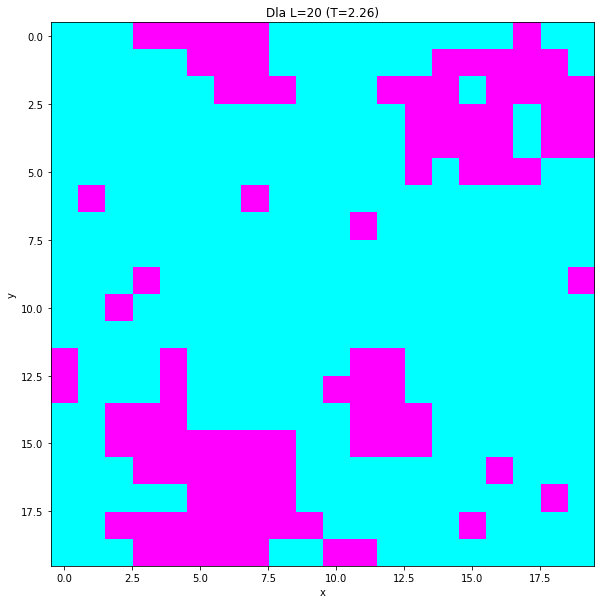

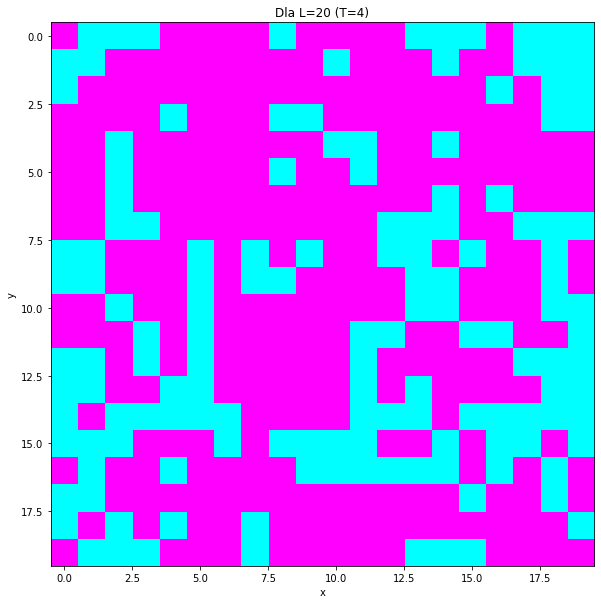

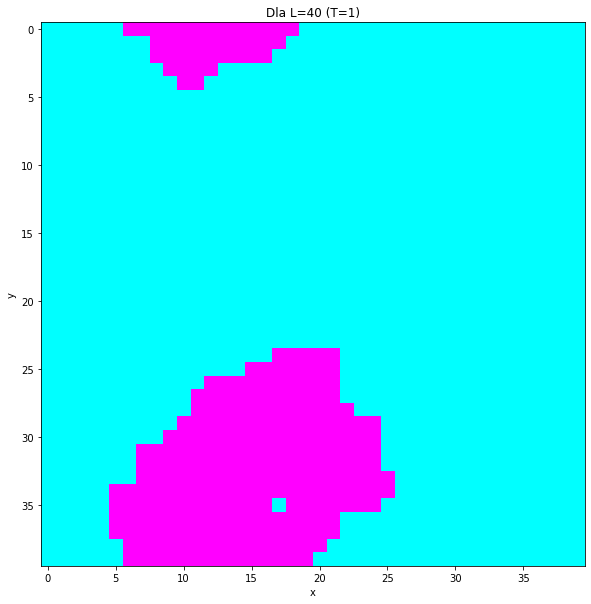

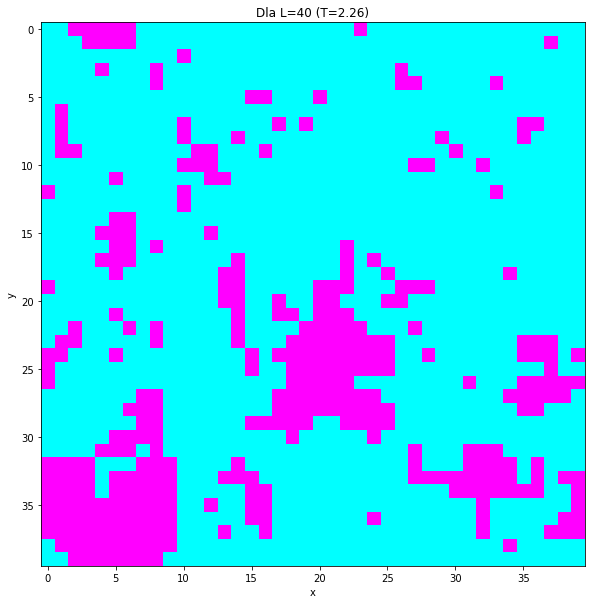

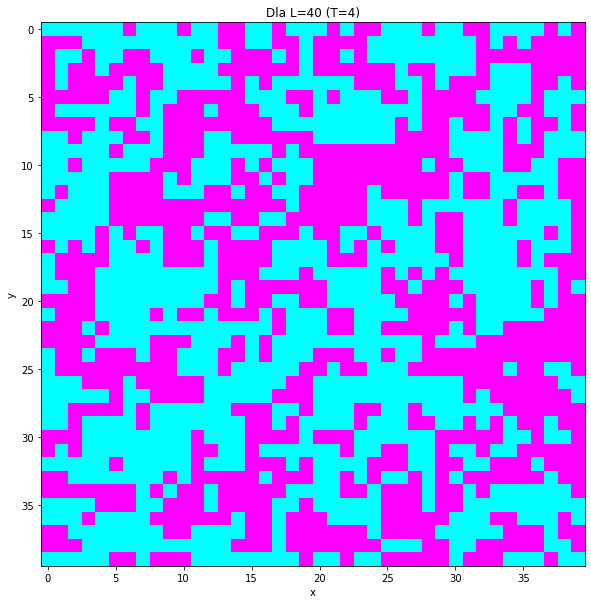

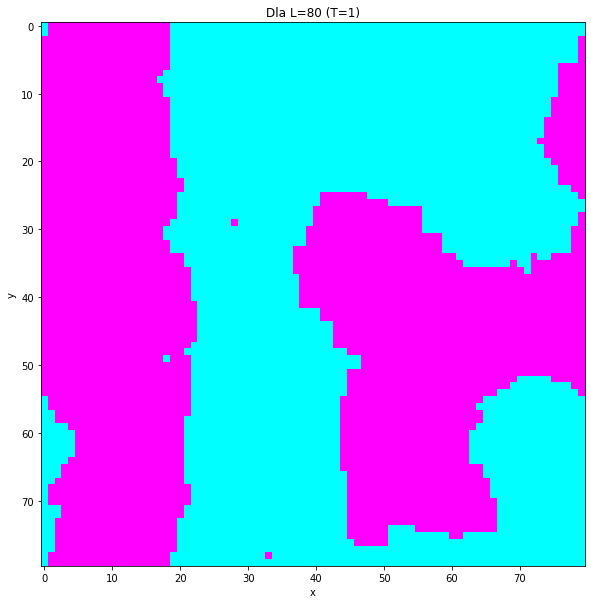

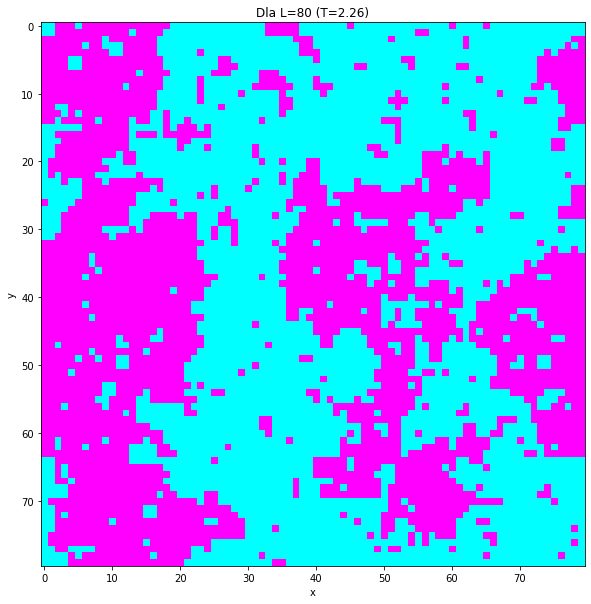

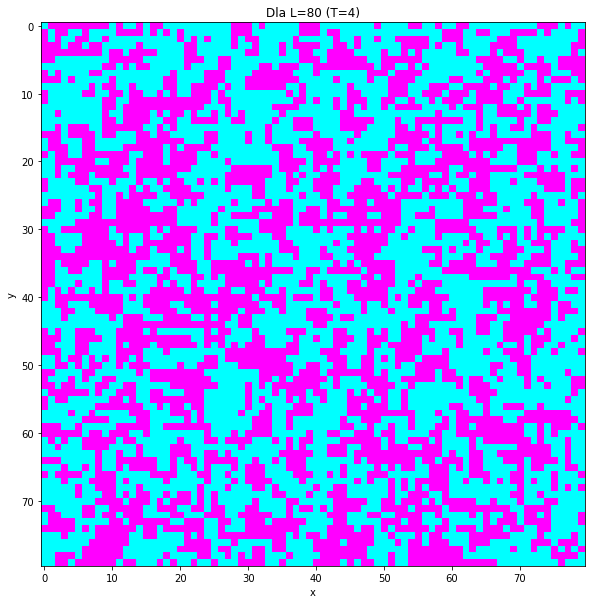

In [7]:
L_values = [10, 20, 40, 80]
temperatures = [1, 2.26, 4]
num_steps = 100

for L in L_values:
    config = np.random.choice([-1, 1], size=(L, L))
    
    for temperature in temperatures:
        config = metropolis_ising(config, temperature, num_steps)
        plot_configuration(config, temperature, f"{L}")

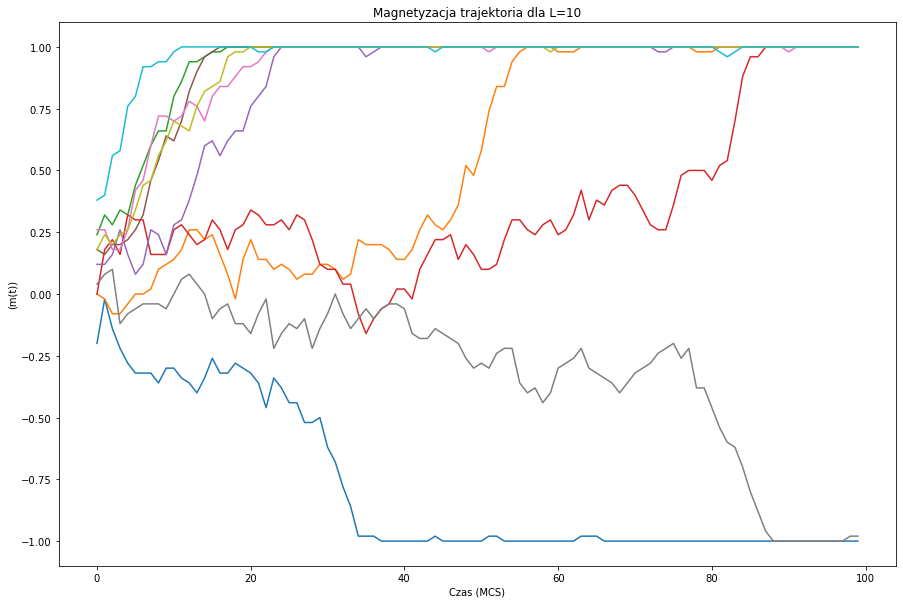

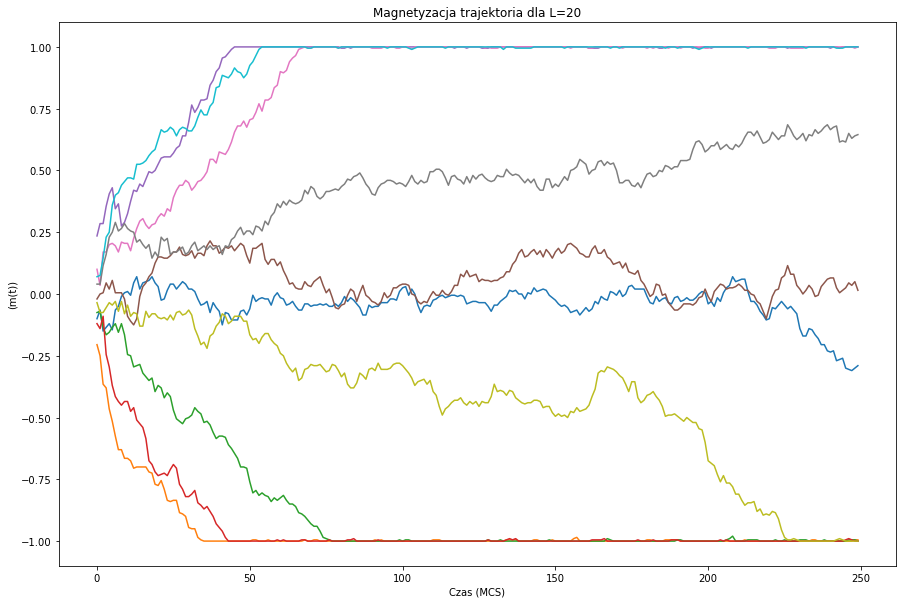

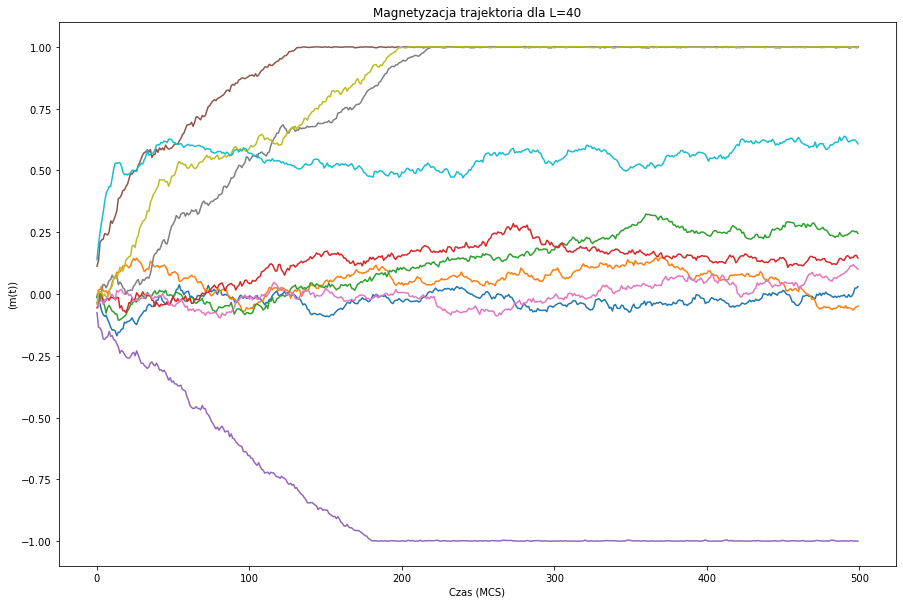

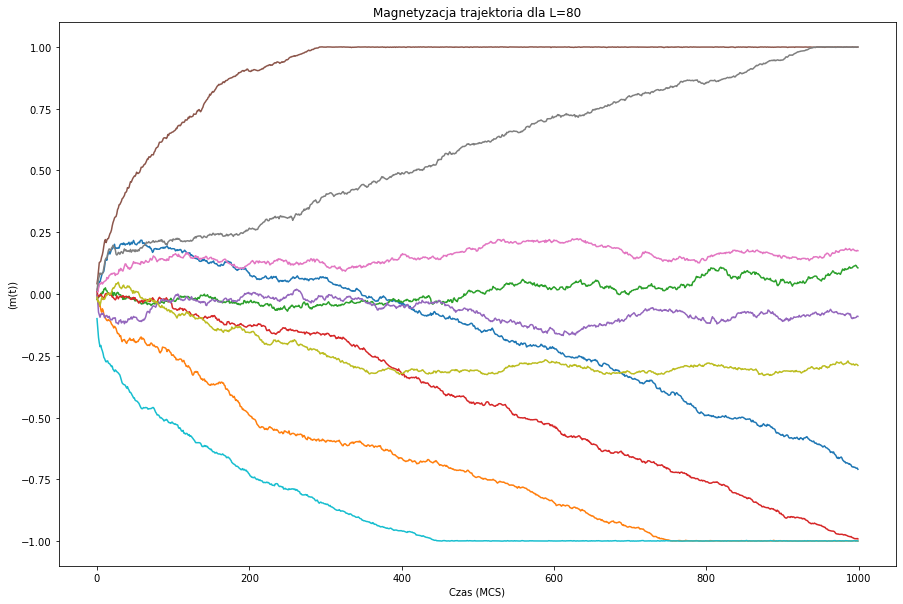

In [8]:
Ls = [10, 20, 40, 80]
temperature = 1
num_steps = [100, 250, 500, 1000]
num_trajectories = 10

for i, L in enumerate(Ls):
    trajectories = []
    for _ in range(num_trajectories):
        config = np.random.choice([-1, 1], size=(L, L))
        magnetizations = metropolis_ising_magnetizations(config, temperature, num_steps[i])
        trajectories.append(magnetizations)

    plot_trajectories(trajectories, L)

In [10]:
T_star = 2/np.log(1+2**(0.5))
T1 = T_star/2
T2 = T_star*2

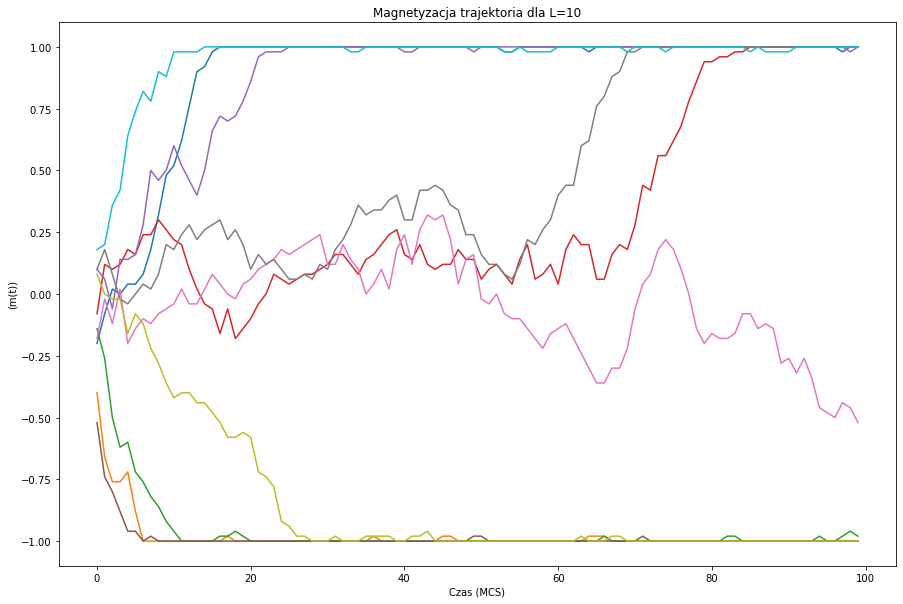

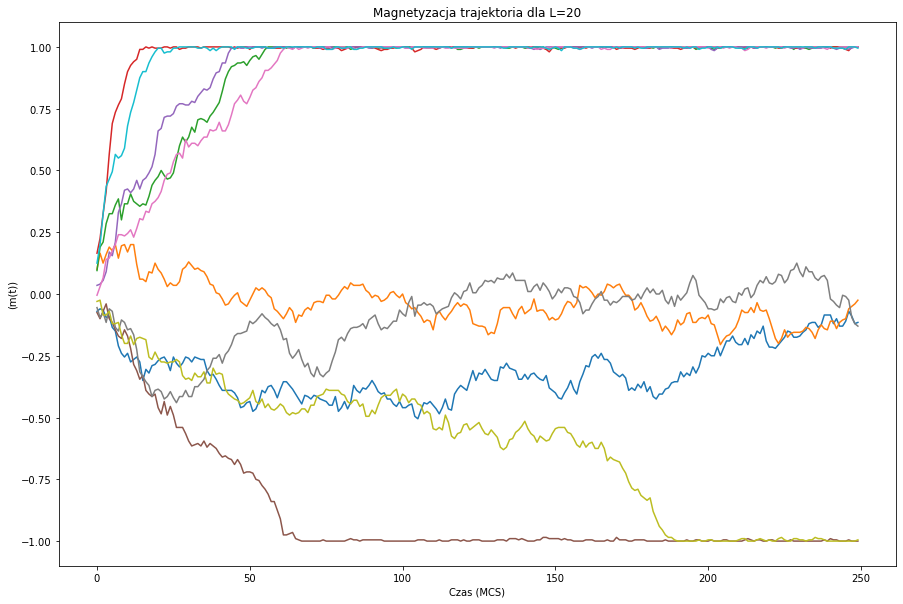

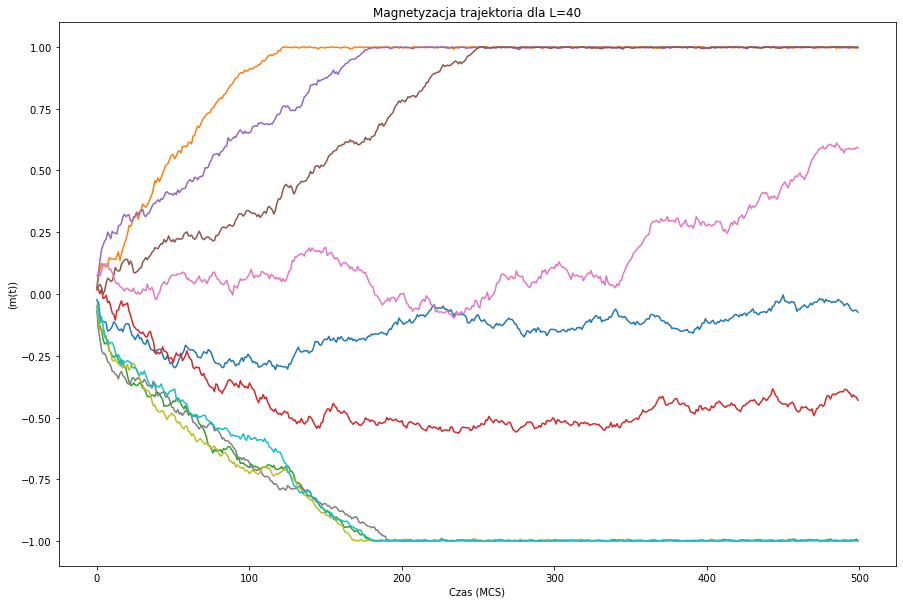

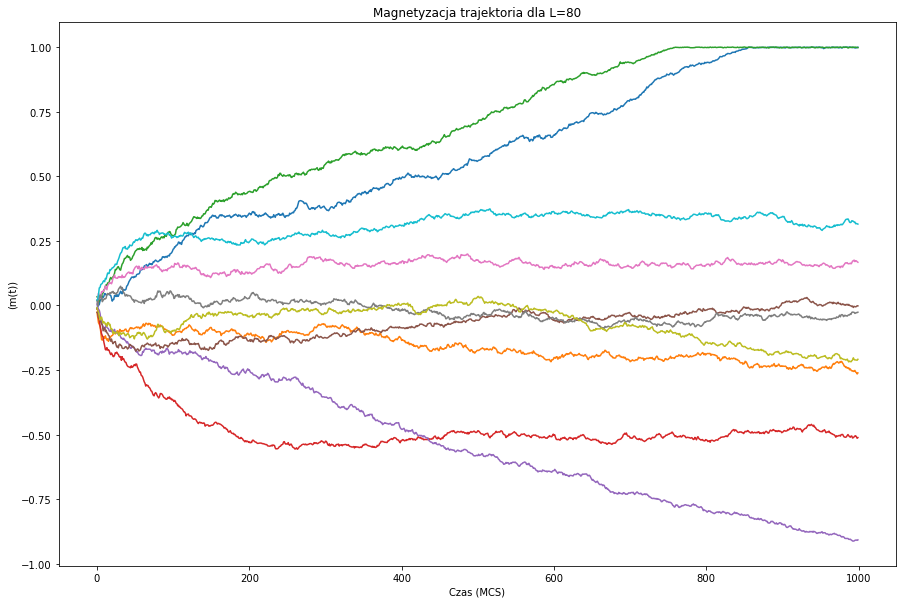

In [11]:
Ls = [10, 20, 40, 80]
temperature = T1
num_steps = [100, 250, 500, 1000]
num_trajectories = 10

for i, L in enumerate(Ls):
    trajectories = []
    for _ in range(num_trajectories):
        config = np.random.choice([-1, 1], size=(L, L))
        magnetizations = metropolis_ising_magnetizations(config, temperature, num_steps[i])
        trajectories.append(magnetizations)

    plot_trajectories(trajectories, L)

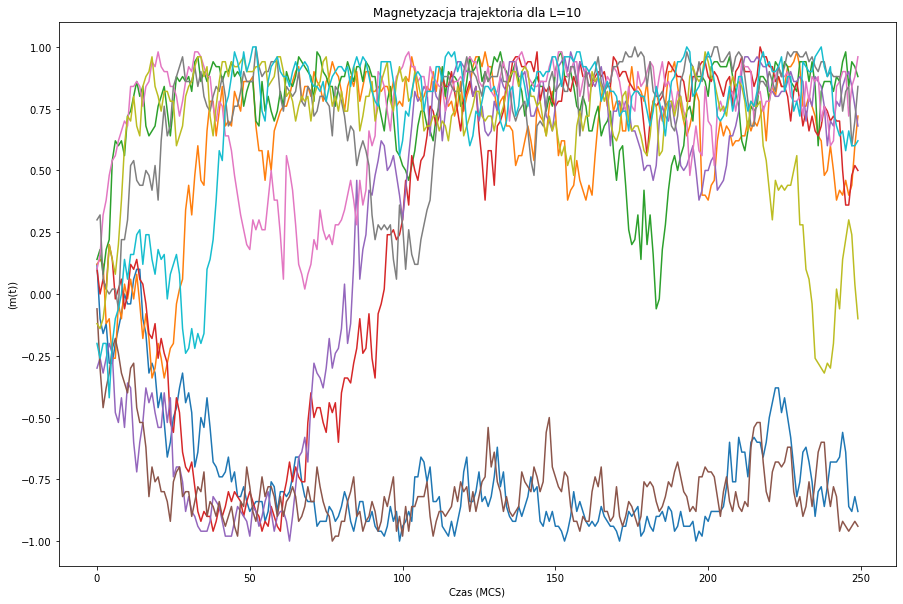

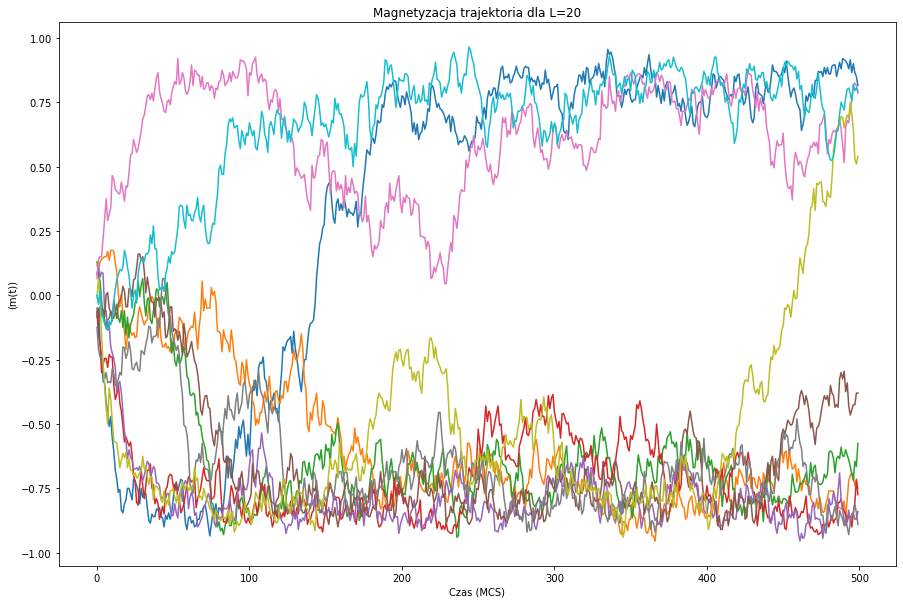

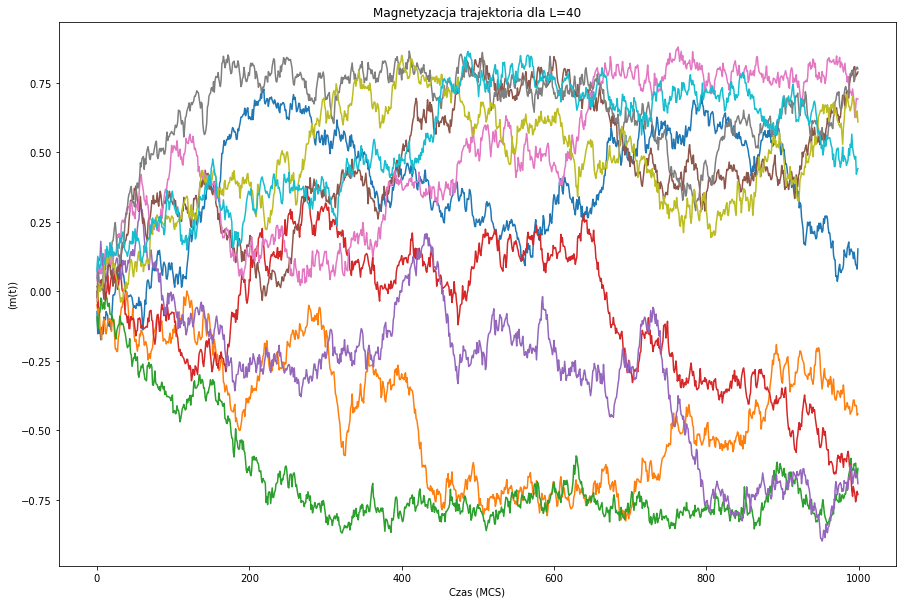

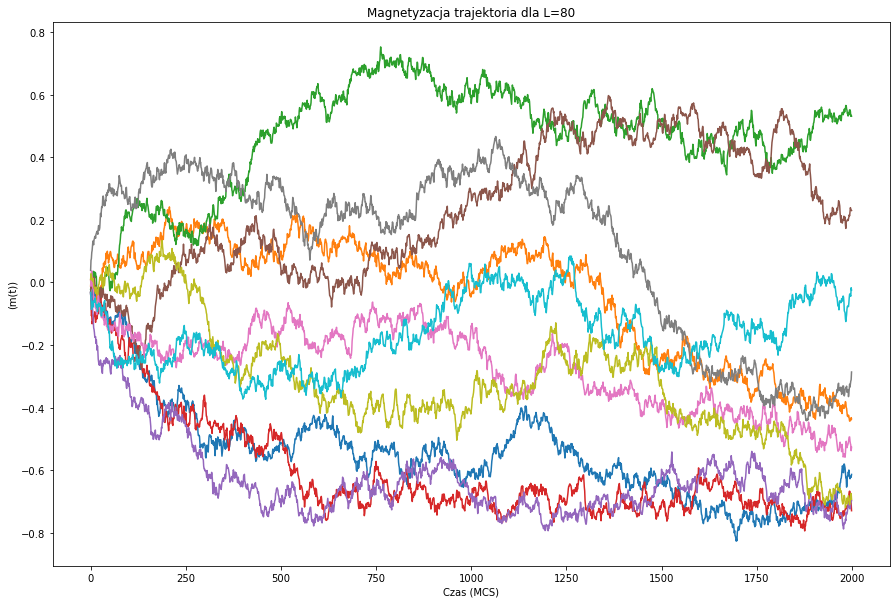

In [12]:
Ls = [10, 20, 40, 80]
temperature = T_star
num_steps = [250, 500, 1000, 2000]
num_trajectories = 10

for i, L in enumerate(Ls):
    trajectories = []
    for _ in range(num_trajectories):
        config = np.random.choice([-1, 1], size=(L, L))
        magnetizations = metropolis_ising_magnetizations(config, temperature, num_steps[i])
        trajectories.append(magnetizations)

    plot_trajectories(trajectories, L)

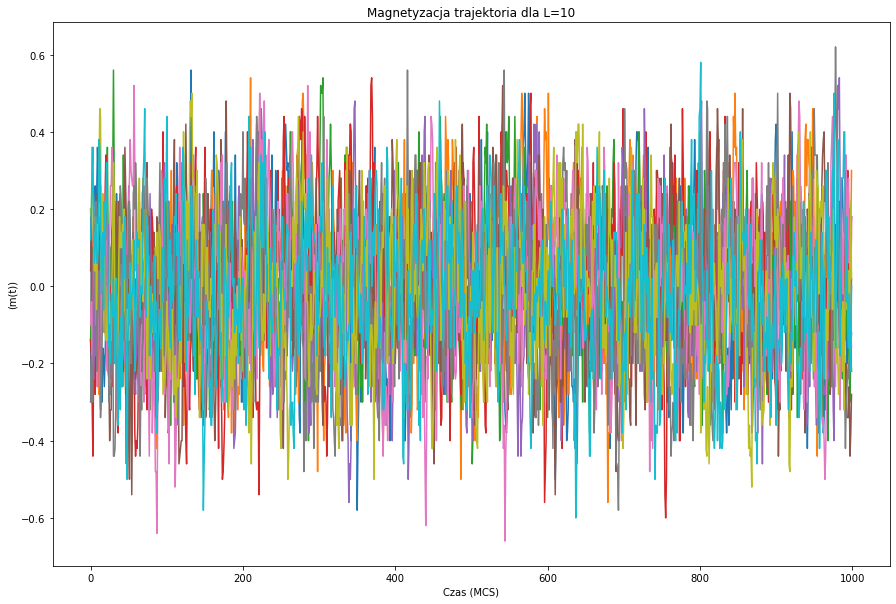

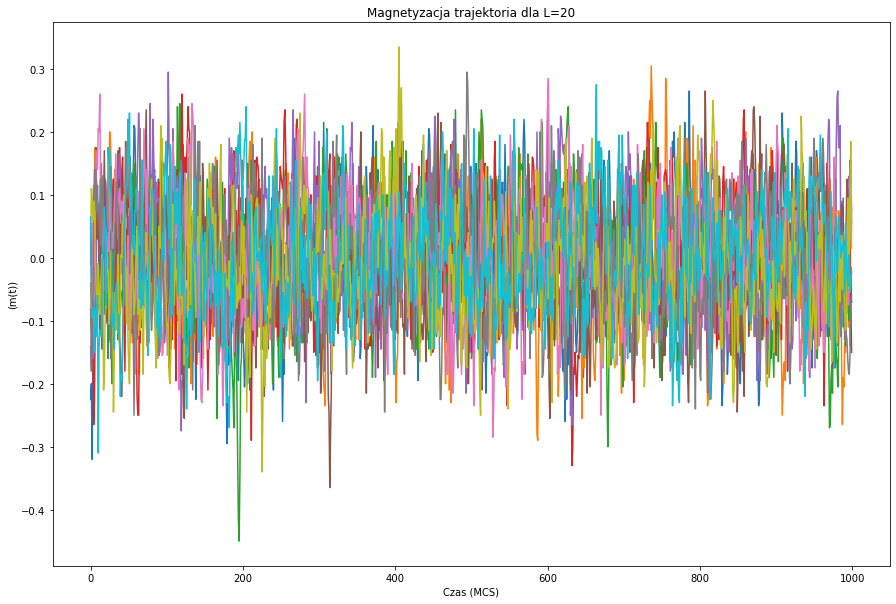

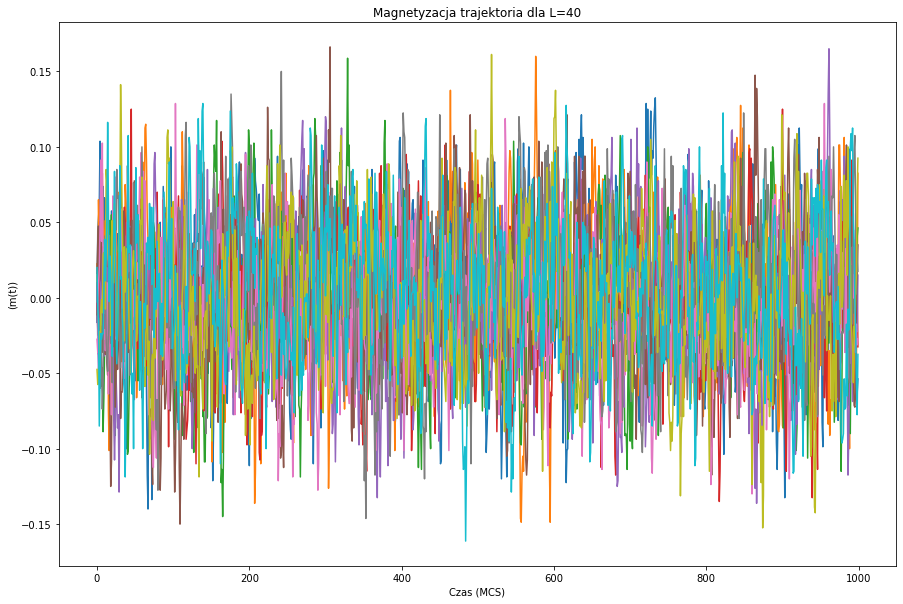

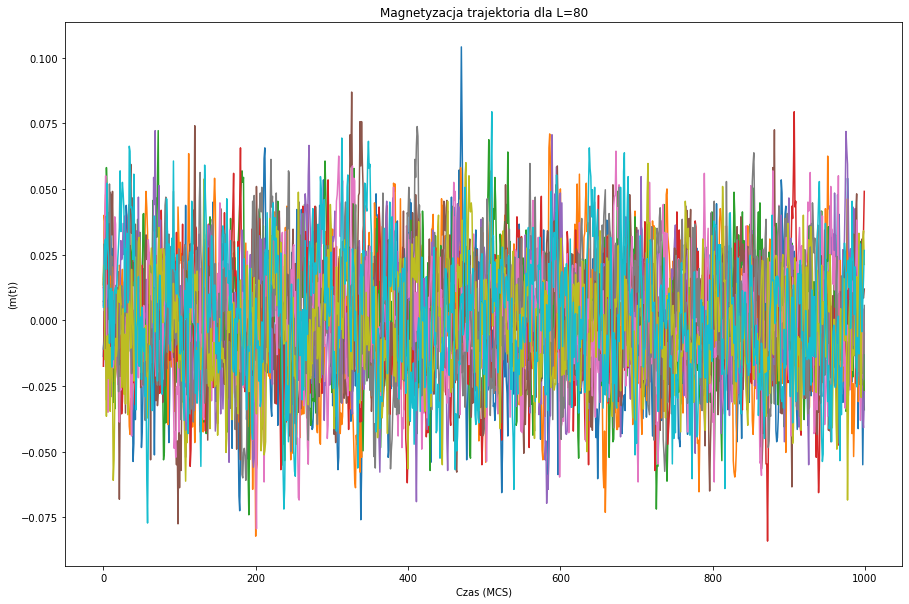

In [13]:
Ls = [10, 20, 40, 80]
temperature = T2
num_steps = 1000
num_trajectories = 10

for L in Ls:
    trajectories = []
    for _ in range(num_trajectories):
        config = np.random.choice([-1, 1], size=(L, L))
        magnetizations = metropolis_ising_magnetizations(config, temperature, num_steps)
        trajectories.append(magnetizations)

    plot_trajectories(trajectories, L)

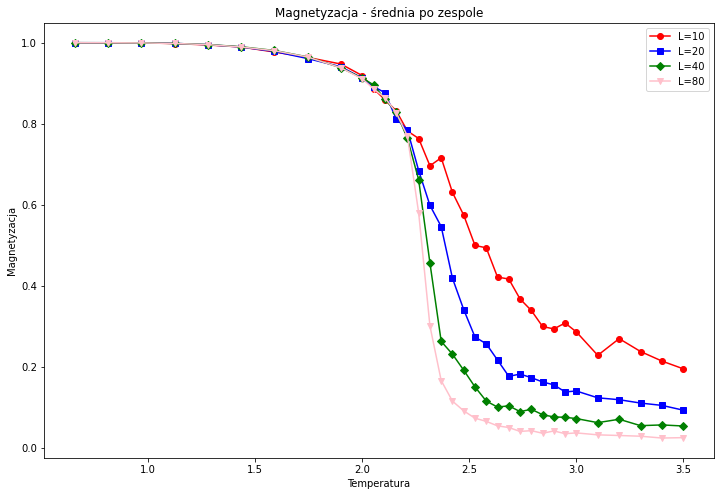

In [14]:
Ls = [10, 20, 40, 80]
temperatures = np.concatenate((np.linspace(0.5, 1.9, 10), np.linspace(2, 3, 20), np.linspace(3.1, 3.5, 5)))
num_steps = 10_000

plt.figure(figsize=(12,8))
colors = ["red", "blue", "green", "pink"]
markers = ['o', 's', 'D', 'v']

for i, L in enumerate(Ls):
    cfg = np.random.choice([-1, 1], size=(L, L))
    magnetizations_L = []
    for temperature in temperatures:
        magnetizations_sim=[]
        for _ in range(100):
            magnetizations_sim.append(np.abs(metropolis_ising_final_magn(cfg, temperature, num_steps)))
        magnetizations_L.append(np.mean(magnetizations_sim))
    plt.plot(temperatures[1:], magnetizations_L[1:], label=f"L={L}", marker = markers[i], color = colors[i])

plt.xlabel('Temperatura')
plt.ylabel('Magnetyzacja')
plt.title('Magnetyzacja - średnia po zespole')
plt.legend()
plt.show()

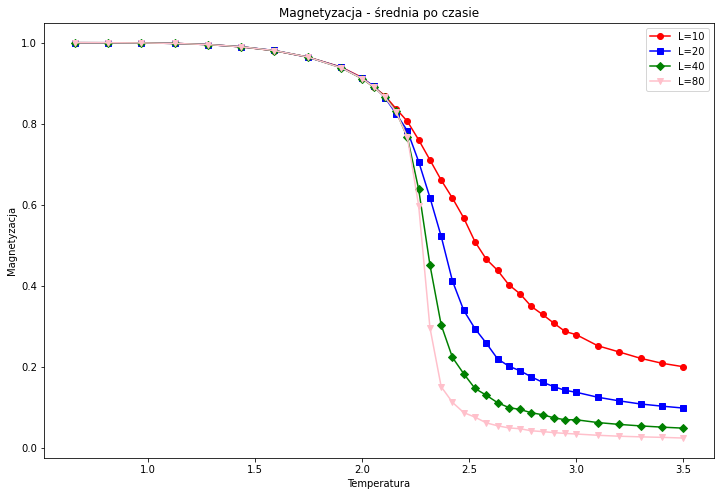

In [15]:
Ls = [10, 20, 40, 80]
temperatures = np.concatenate((np.linspace(0.5, 1.9, 10), np.linspace(2, 3, 20), np.linspace(3.1, 3.5, 5)))
num_steps = 100_000

plt.figure(figsize=(12,8))
colors = ["red", "blue", "green", "pink"]
markers = ['o', 's', 'D', 'v']

for i, L in enumerate(Ls):
    cfg = np.ones((L, L))
    magnetizations=[]
    for T in temperatures:
        mean_ = np.mean(np.abs(metropolis_ising_magnetizations(cfg, T, num_steps)[50_000:]))
        magnetizations.append(mean_)
    plt.plot(temperatures[1:], magnetizations[1:], label=f"L={L}", marker = markers[i], color = colors[i])

plt.xlabel('Temperatura')
plt.ylabel('Magnetyzacja')
plt.title('Magnetyzacja - średnia po czasie')
plt.legend()
plt.show()